In [ ]:
# df = pd.read_csv('./spambase/spambase.data')
# with open('./spambase/spambase.names', 'r') as names_file:
#     # Assuming the column names are listed one per line
#     column_names = [line.strip() for line in names_file.readlines()]
# print(column_names)
# print(df)


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
df = pd.read_csv('./spam_or_not_spam.csv/spam_or_not_spam.csv')
print(df)

                                                  email  label
0      date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1     martin a posted tassos papadopoulos the greek ...      0
2     man threatens explosion in moscow thursday aug...      0
3     klez the virus that won t die already the most...      0
4      in adding cream to spaghetti carbonara which ...      0
...                                                 ...    ...
2995   abc s good morning america ranks it the NUMBE...      1
2996   hyperlink hyperlink hyperlink let mortgage le...      1
2997   thank you for shopping with us gifts for all ...      1
2998   the famous ebay marketing e course learn to s...      1
2999   hello this is chinese traditional 子 件 NUMBER世...      1

[3000 rows x 2 columns]


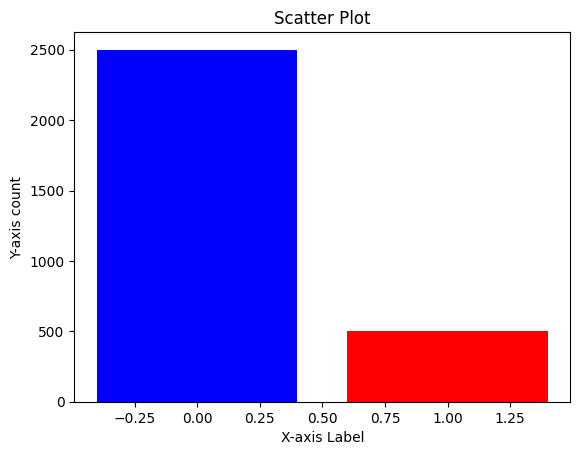

In [24]:
label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values, color=['blue', 'red'])
plt.title('Scatter Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis count')
plt.show()


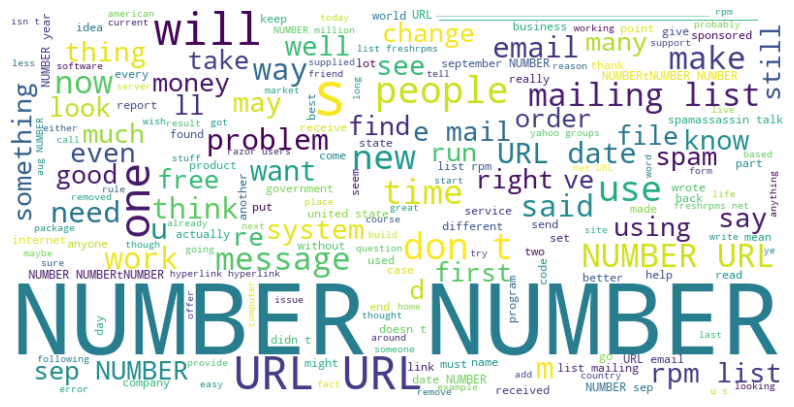

In [27]:
text = ' '.join(df['email'].astype(str))
wcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2, random_state=50)

In [37]:
x_train = ["" if pd.isna(text) else text for text in x_train]
x_test = ["" if pd.isna(text) else text for text in x_test]
vectorization = CountVectorizer(lowercase=False)
x_train_vectorized = vectorization.fit_transform(x_train)
x_test_vectorized = vectorization.transform(x_test)

In [38]:
classifair = MultinomialNB()
classifair.fit(x_train_vectorized, y_train)


MultinomialNB()

In [39]:
predictions = classifair.predict(x_test_vectorized)

In [40]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [44]:
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
print("Results after testing the model on test set:\n")
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Results after testing the model on test set:

Accuracy: 0.99
Confusion Matrix:
[[495   1]
 [  5  99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       496
           1       0.99      0.95      0.97       104

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600

